# Swati Dogra  - DSC 550  -  Final Project


### Sales Project
In this project, we will work with a dataset on the Sales Dataset (E-Commerce Sales). The dataset can be downloaded from here: https://www.kaggle.com/datasets/naofilahmad/sales-datset-product-sample. 

Business Problem: The primary objective of this analysis is to understand the sales patterns and identify key factors that influence product sales. By leveraging the sales dataset from Kaggle, we aim to build a predictive model that can forecast future sales based on historical data. This model will help businesses optimize inventory management, improve marketing strategies, and enhance overall sales performance.

Problem Identification: The main problem we are addressing is the unpredictability of sales, which can lead to overstocking or stockouts, affecting the business’s profitability. Our target is to predict the sales volume for each product category, considering various factors such as time of year, product type, and customer demographics.

Target for the Model: The target variable for our model will be the sales volume, which we aim to predict using features like ordered quantity, price each, month, and hour of purchase. By accurately forecasting sales, businesses can make informed decisions about inventory levels, promotional activities, and resource allocation.

This notebook demonstrates various techniques for handling data in Python. It covers exploratory data analysis, data preparation for model building, and the model building and evaluation process. While it is not an exhaustive guide on model building, it offers guidelines on creating notebooks and coding essential steps in data exploration and the model building and evaluation process.

In [11]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring the Data

In [13]:
# Load the data
retail_sales_data = pd.read_csv('C:/Users/swati/DSC 550/Sales Data.csv')

# Display the first few rows of the dataset
retail_sales_data.head()

,Unnamed: 0,Order ID,Product Category,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Time of Day
0,0,295665,Laptops and Computers,Macbook Pro Laptop,1,1700.00,30-12-2019 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,Night
1,1,295666,Home Appliances,LG Washing Machine,1,600.00,29-12-2019 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,Morning
2,2,295667,Charging Cables,USB-C Charging Cable,1,11.95,12-12-2019 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,Evening
3,3,295668,Monitors,27in FHD Monitor,1,149.99,22-12-2019 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,Afternoon
4,4,295669,Charging Cables,USB-C Charging Cable,1,11.95,18-12-2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,Afternoon


In [16]:
#display the dimensions of the dataframe
retail_sales_data.shape

(185950, 13)

### Observations

$\bullet$ The dataset has $185950$ rows and $13$ columns <br>
$\bullet$ Some of the columns will not be useful for model building, e.g., 'Unnamed', 'Order ID' <br>
$\bullet$ There is a mix of numerical and categorical data <br>

In [19]:
#look at the column data types
retail_sales_data.dtypes

Unnamed: 0            int64
Order ID              int64
Product Category     object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
Hour                  int64
Time of Day          object
dtype: object

In [21]:
#get summary statistics of the numerical data
retail_sales_data.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


In [23]:
#get summary statistics of the non-numerical data
retail_sales_data.describe(include = ['O'])

,Product Category,Product,Order Date,Purchase Address,City,Time of Day
count,185950,185950,185950,185950,185950,185950
unique,8,19,142395,140787,9,4
top,Audio Devices,USB-C Charging Cable,15-12-2019 20:16,"193 Forest St, San Francisco, CA 94016",San Francisco,Afternoon
freq,47756,21903,8,9,44732,67158


In [25]:

# Calculate total sales value
retail_sales_data['Total_Sales_Value'] = retail_sales_data['Price Each'] * retail_sales_data['Quantity Ordered']

# Basic statistics
mean_sales = retail_sales_data['Total_Sales_Value'].mean()
median_sales = retail_sales_data['Total_Sales_Value'].median()
std_sales = retail_sales_data['Total_Sales_Value'].std()

print(f'Mean Sales Value: ${mean_sales:.2f}')
print(f'Median Sales Value: ${median_sales:.2f}')
print(f'Standard Deviation of Sales Value: ${std_sales:.2f}')

# Correlation matrix
correlation_matrix = retail_sales_data[['Price Each', 'Quantity Ordered', 'Total_Sales_Value']].corr()
print('Correlation Matrix:')
print(correlation_matrix)

# Group by product category and calculate statistics
category_stats = retail_sales_data.groupby('Product Category').agg({
    'Total_Sales_Value': ['mean', 'median', 'std'],
    'Quantity Ordered': ['mean', 'median', 'std'],
    'Price Each': ['mean', 'median', 'std']
}).reset_index()

print('Category-wise Statistics:')
print(category_stats)


Mean Sales Value: $185.49
Median Sales Value: $14.95
Standard Deviation of Sales Value: $332.92
Correlation Matrix:
                   Price Each  Quantity Ordered  Total_Sales_Value
Price Each           1.000000         -0.148272           0.999203
Quantity Ordered    -0.148272          1.000000          -0.139417
Total_Sales_Value    0.999203         -0.139417           1.000000
Category-wise Statistics:
         Product Category Total_Sales_Value                       \
                                       mean   median         std   
0           Audio Devices         82.527721    99.99   60.172368   
1                Batterie          4.824573     3.84    2.619236   
2         Charging Cables         14.545015    14.95    4.280632   
3   Entertainment Devices        301.187500   300.00   18.839156   
4         Home Appliances        600.000000   600.00    0.000000   
5   Laptops and Computers       1374.554756  1700.00  351.888820   
6                Monitors        265.507672   

### Graphical analysis creating graphs

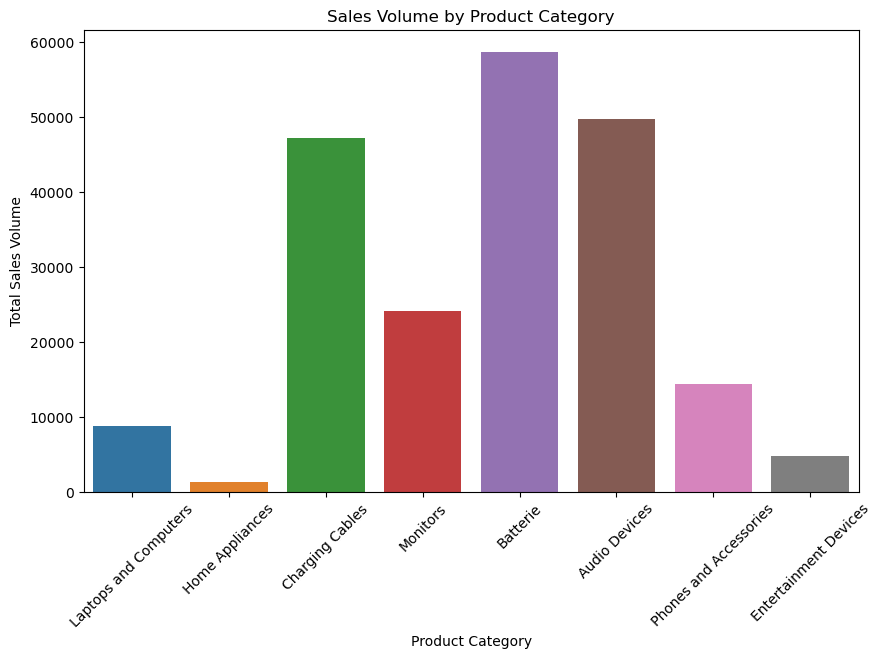

In [28]:
# 1. Sales Volume by Product Category

plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Quantity Ordered', data=retail_sales_data, estimator=sum, errorbar=None)
plt.title('Sales Volume by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=45)
plt.show()

Sales Volume by Product Category: From the graph, we can see that various electronic categories, such as Batterie, Audio Devices and Charging Cables, have significantly higher sales volumes compared to others. This insight can guide inventory and marketing focus.

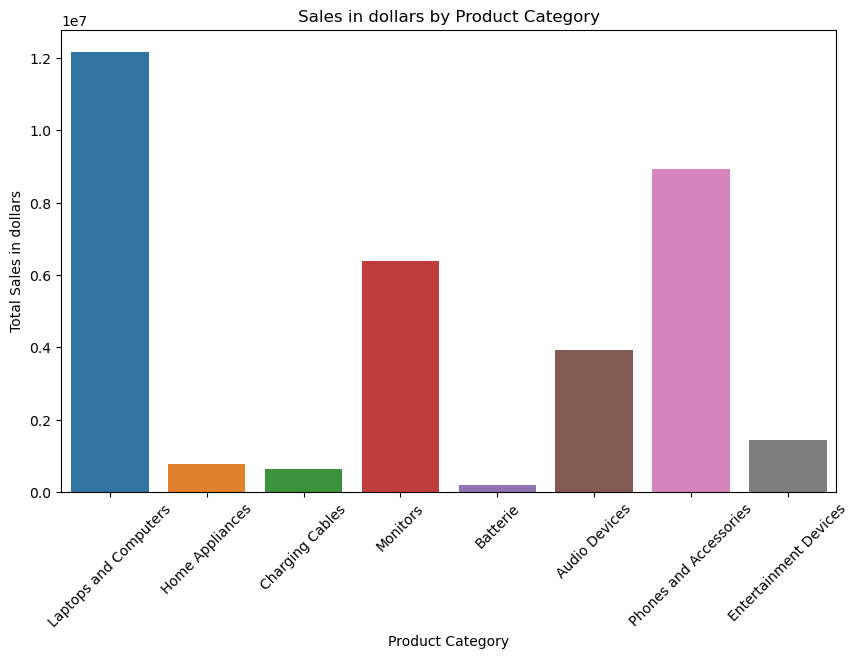

In [31]:
# 2. Sales in dollar by Product Category

plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Sales', data=retail_sales_data, estimator=sum, errorbar=None)
plt.title('Sales in dollars by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales in dollars')
plt.xticks(rotation=45)
plt.show()

Sales in dollars by Product Category: From the graph, we can see that Laptops and Computers have significantly higher dollar sales compared to others. This insight can guide marketing focus for total revenue.

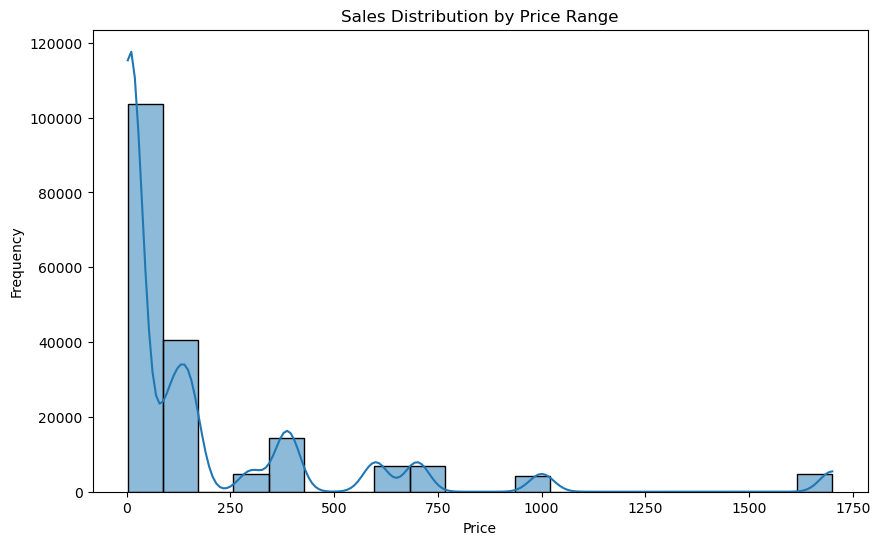

In [34]:
# 3. Sales Distribution by Price Range

import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10, 6))
sns.histplot(retail_sales_data['Price Each'], bins=20, kde=True)
plt.title('Sales Distribution by Price Range')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Sales Distribution by Price Range: The histogram shows that most sales occur within a specific price range, indicating customer preference for low-range products. This insight can inform pricing strategies.

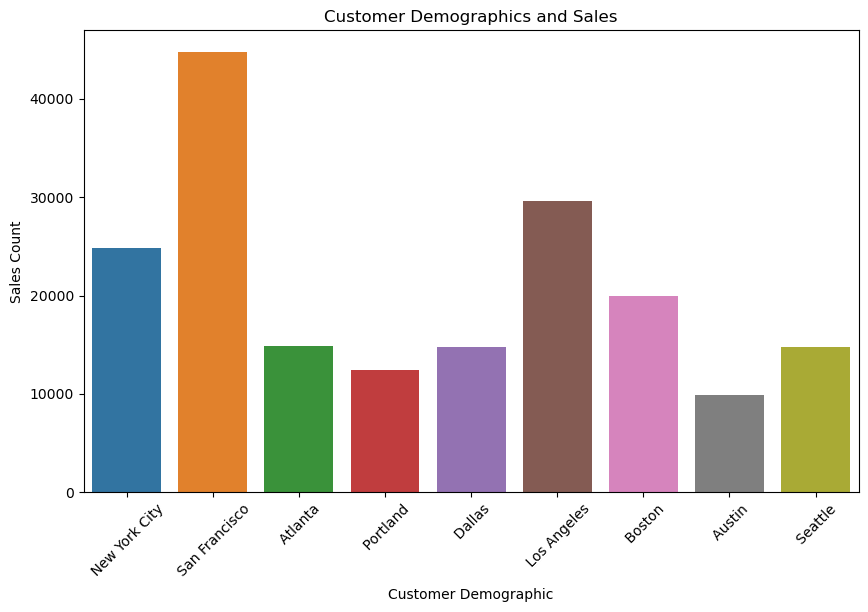

In [36]:
# 4. Customer Demographics and Sales

plt.figure(figsize=(10, 6))
sns.countplot(x='City', data=retail_sales_data)
plt.title('Customer Demographics and Sales')
plt.xlabel('Customer Demographic')
plt.ylabel('Sales Count')
plt.xticks(rotation=45)
plt.show()

Customer Demographics and Sales: 
Chart indicates that a significant portion of sales comes from a particular demographic group. This information can be used to tailor marketing efforts to the most profitable customer segments.


### Conclusions

From the graphical analysis, we gain several insights:

1. Product Popularity: Batterie, Audio Devices and Charging Cables, have significantly higher sales volumes compared to others. They are the top-selling categories.
2. Revenue Generation: Laptops and Computers are high ticketed items that brings in good revenue.
3. Price Sensitivity: Most sales in volume occur within a low-range price bracket.
4. Target Demographics: Certain customer demographics contribute more significantly to sales.

These insights will guide the development of our predictive model, helping businesses make data-driven decisions to optimize sales and improve profitability.

## End of Milestone 1

## Beginning of Milestone 2

##### Drop any features that are not useful for your model building and explain why they are not useful

In [44]:
# Dropping 'Unnamed' and 'Order ID' fields
retail_sales_data.drop(columns=['Unnamed: 0', 'Order ID', 'Purchase Address', 'Total_Sales_Value'], inplace=True)

print(retail_sales_data.head())

        Product Category               Product  Quantity Ordered  Price Each  \
0  Laptops and Computers    Macbook Pro Laptop                 1     1700.00   
1        Home Appliances    LG Washing Machine                 1      600.00   
2        Charging Cables  USB-C Charging Cable                 1       11.95   
3               Monitors      27in FHD Monitor                 1      149.99   
4        Charging Cables  USB-C Charging Cable                 1       11.95   

         Order Date  Month    Sales            City  Hour Time of Day  
0  30-12-2019 00:01     12  1700.00   New York City     0       Night  
1  29-12-2019 07:03     12   600.00   New York City     7     Morning  
2  12-12-2019 18:21     12    11.95   New York City    18     Evening  
3  22-12-2019 15:13     12   149.99   San Francisco    15   Afternoon  
4  18-12-2019 12:38     12    11.95         Atlanta    12   Afternoon  


Dropping ID columns: Often, datasets include unique identifiers like Order IDs. These are usually arbitrary and don’t provide predictive power.

In [47]:
# Dropping features with high missing values
threshold = 0.5  # If more than 50% values are missing
retail_sales_data.dropna(thresh=int(threshold * len(retail_sales_data)), axis=1, inplace=True)

print(retail_sales_data.head())
retail_sales_data.shape

        Product Category               Product  Quantity Ordered  Price Each  \
0  Laptops and Computers    Macbook Pro Laptop                 1     1700.00   
1        Home Appliances    LG Washing Machine                 1      600.00   
2        Charging Cables  USB-C Charging Cable                 1       11.95   
3               Monitors      27in FHD Monitor                 1      149.99   
4        Charging Cables  USB-C Charging Cable                 1       11.95   

         Order Date  Month    Sales            City  Hour Time of Day  
0  30-12-2019 00:01     12  1700.00   New York City     0       Night  
1  29-12-2019 07:03     12   600.00   New York City     7     Morning  
2  12-12-2019 18:21     12    11.95   New York City    18     Evening  
3  22-12-2019 15:13     12   149.99   San Francisco    15   Afternoon  
4  18-12-2019 12:38     12    11.95         Atlanta    12   Afternoon  


(185950, 10)

Features with a lot of missing values: If a feature has too many missing values, it might be better to drop it rather than impute those values.

##### Perform any data extraction/selection steps

In [51]:
# Convert data types - Ensuring all data types are correct
retail_sales_data['Order Date'] = pd.to_datetime(retail_sales_data['Order Date'])

print(retail_sales_data.head())

        Product Category               Product  Quantity Ordered  Price Each  \
0  Laptops and Computers    Macbook Pro Laptop                 1     1700.00   
1        Home Appliances    LG Washing Machine                 1      600.00   
2        Charging Cables  USB-C Charging Cable                 1       11.95   
3               Monitors      27in FHD Monitor                 1      149.99   
4        Charging Cables  USB-C Charging Cable                 1       11.95   

           Order Date  Month    Sales            City  Hour Time of Day  
0 2019-12-30 00:01:00     12  1700.00   New York City     0       Night  
1 2019-12-29 07:03:00     12   600.00   New York City     7     Morning  
2 2019-12-12 18:21:00     12    11.95   New York City    18     Evening  
3 2019-12-22 15:13:00     12   149.99   San Francisco    15   Afternoon  
4 2019-12-18 12:38:00     12    11.95         Atlanta    12   Afternoon  


Ensuring that data types are correct.

In [53]:
# Handling missing values - Fill in or drop any remaining missing values.
retail_sales_data.dropna(inplace=True)

print(retail_sales_data.head())

        Product Category               Product  Quantity Ordered  Price Each  \
0  Laptops and Computers    Macbook Pro Laptop                 1     1700.00   
1        Home Appliances    LG Washing Machine                 1      600.00   
2        Charging Cables  USB-C Charging Cable                 1       11.95   
3               Monitors      27in FHD Monitor                 1      149.99   
4        Charging Cables  USB-C Charging Cable                 1       11.95   

           Order Date  Month    Sales            City  Hour Time of Day  
0 2019-12-30 00:01:00     12  1700.00   New York City     0       Night  
1 2019-12-29 07:03:00     12   600.00   New York City     7     Morning  
2 2019-12-12 18:21:00     12    11.95   New York City    18     Evening  
3 2019-12-22 15:13:00     12   149.99   San Francisco    15   Afternoon  
4 2019-12-18 12:38:00     12    11.95         Atlanta    12   Afternoon  


Impute or drop remaining missing values as needed.

Focusing on columns that are most likely to influence target variable.

##### Transform features if necessary

In [59]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Feature Engineering: - Extracting 'Month' from 'Order Date'
retail_sales_data['Order Date'] = pd.to_datetime(retail_sales_data['Order Date'])
retail_sales_data['Order Month'] = retail_sales_data['Order Date'].dt.month


# Convert Order Date to datetime
retail_sales_data['Order Date'] = pd.to_datetime(retail_sales_data['Order Date'])

# Extract Month and Hour from Order Date
retail_sales_data['Month'] = retail_sales_data['Order Date'].dt.month
retail_sales_data['Hour'] = retail_sales_data['Order Date'].dt.hour

# Create a 'Sales' column
retail_sales_data['Sales'] = retail_sales_data['Quantity Ordered'] * retail_sales_data['Price Each']

print(retail_sales_data.head())


        Product Category               Product  Quantity Ordered  Price Each  \
0  Laptops and Computers    Macbook Pro Laptop                 1     1700.00   
1        Home Appliances    LG Washing Machine                 1      600.00   
2        Charging Cables  USB-C Charging Cable                 1       11.95   
3               Monitors      27in FHD Monitor                 1      149.99   
4        Charging Cables  USB-C Charging Cable                 1       11.95   

           Order Date  Month    Sales            City  Hour Time of Day  \
0 2019-12-30 00:01:00     12  1700.00   New York City     0       Night   
1 2019-12-29 07:03:00     12   600.00   New York City     7     Morning   
2 2019-12-12 18:21:00     12    11.95   New York City    18     Evening   
3 2019-12-22 15:13:00     12   149.99   San Francisco    15   Afternoon   
4 2019-12-18 12:38:00     12    11.95         Atlanta    12   Afternoon   

   Order Month  
0           12  
1           12  
2           12  


In [60]:
# Select relevant features
features = ['Quantity Ordered', 'Price Each', 'Month', 'Hour']
X = retail_sales_data[features]
y = retail_sales_data['Sales']

Feature Engineering: Create new features from existing ones.

##### Engineer new useful features

In [65]:
# Ensure 'Order Date' is in datetime format
retail_sales_data['Order Date'] = pd.to_datetime(retail_sales_data['Order Date'])

# Feature Engineering
# Total Sales
retail_sales_data['Total Sales'] = retail_sales_data['Quantity Ordered'] * retail_sales_data['Price Each']

# Day of the Week
retail_sales_data['Day of the Week'] = retail_sales_data['Order Date'].dt.dayofweek

# Is Weekend
retail_sales_data['Is Weekend'] = retail_sales_data['Day of the Week'].apply(lambda x: 1 if x >= 5 else 0)

# Seasonality
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

retail_sales_data['Season'] = retail_sales_data['Order Date'].apply(get_season)

print(retail_sales_data.head())


        Product Category               Product  Quantity Ordered  Price Each  \
0  Laptops and Computers    Macbook Pro Laptop                 1     1700.00   
1        Home Appliances    LG Washing Machine                 1      600.00   
2        Charging Cables  USB-C Charging Cable                 1       11.95   
3               Monitors      27in FHD Monitor                 1      149.99   
4        Charging Cables  USB-C Charging Cable                 1       11.95   

           Order Date  Month    Sales            City  Hour Time of Day  \
0 2019-12-30 00:01:00     12  1700.00   New York City     0       Night   
1 2019-12-29 07:03:00     12   600.00   New York City     7     Morning   
2 2019-12-12 18:21:00     12    11.95   New York City    18     Evening   
3 2019-12-22 15:13:00     12   149.99   San Francisco    15   Afternoon   
4 2019-12-18 12:38:00     12    11.95         Atlanta    12   Afternoon   

   Order Month  Total Sales  Day of the Week  Is Weekend  Season  
0

Total Sales: Multiply Quantity Ordered by Price Each.

Day of the Week: Extract the day from Order Date to see if sales vary by day.

Is Weekend: Create a binary feature that indicates if the order was placed on a weekend.

Seasonality: Extract the season from the Order Date to capture seasonal trends.

##### Deal with missing data (do not just drop rows or columns without justifying this)

In [69]:
import numpy as np
from sklearn.impute import SimpleImputer


# For numerical data, fill with mean
num_imputer = SimpleImputer(strategy='mean')
retail_sales_data['Price Each'] = num_imputer.fit_transform(retail_sales_data[['Price Each']])

print(retail_sales_data.head())


        Product Category               Product  Quantity Ordered  Price Each  \
0  Laptops and Computers    Macbook Pro Laptop                 1     1700.00   
1        Home Appliances    LG Washing Machine                 1      600.00   
2        Charging Cables  USB-C Charging Cable                 1       11.95   
3               Monitors      27in FHD Monitor                 1      149.99   
4        Charging Cables  USB-C Charging Cable                 1       11.95   

           Order Date  Month    Sales            City  Hour Time of Day  \
0 2019-12-30 00:01:00     12  1700.00   New York City     0       Night   
1 2019-12-29 07:03:00     12   600.00   New York City     7     Morning   
2 2019-12-12 18:21:00     12    11.95   New York City    18     Evening   
3 2019-12-22 15:13:00     12   149.99   San Francisco    15   Afternoon   
4 2019-12-18 12:38:00     12    11.95         Atlanta    12   Afternoon   

   Order Month  Total Sales  Day of the Week  Is Weekend  Season  
0

Understand the Pattern: Figure out why data is missing and if there's any pattern. This can help in deciding how to handle it.

Imputation: Fill missing values based on other data points. For numerical data, common methods include mean, median, or mode.


##### Create dummy variables if necessary

    

In [73]:
# Converting categorical 'Is Weekend' and 'Season' columns into dummy variables
retail_sales_data = pd.get_dummies(retail_sales_data, columns=['Is Weekend','Season'], drop_first=True)

print(retail_sales_data.head())

        Product Category               Product  Quantity Ordered  Price Each  \
0  Laptops and Computers    Macbook Pro Laptop                 1     1700.00   
1        Home Appliances    LG Washing Machine                 1      600.00   
2        Charging Cables  USB-C Charging Cable                 1       11.95   
3               Monitors      27in FHD Monitor                 1      149.99   
4        Charging Cables  USB-C Charging Cable                 1       11.95   

           Order Date  Month    Sales            City  Hour Time of Day  \
0 2019-12-30 00:01:00     12  1700.00   New York City     0       Night   
1 2019-12-29 07:03:00     12   600.00   New York City     7     Morning   
2 2019-12-12 18:21:00     12    11.95   New York City    18     Evening   
3 2019-12-22 15:13:00     12   149.99   San Francisco    15   Afternoon   
4 2019-12-18 12:38:00     12    11.95         Atlanta    12   Afternoon   

   Order Month  Total Sales  Day of the Week  Is Weekend_1  Season_S

Created dummy variables for Is Weekend and Season columns

### End of Milestone 2

### Beginning of Milestone 3

###### Importing Libraries

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


##### Encoding Categorical Variables: Convert categorical variables into numeric format

In [82]:
# One-Hot Encoding for categorical features like 'Product Category', 'Product', 'City', 'Time of Day'
retail_sales_data = pd.get_dummies(retail_sales_data, columns=['Product Category', 'Product', 'City', 'Time of Day'])

##### Feature Selection : Select relevant features for the model

Sales is the target variable and the features are Quantity Ordered, Price Each, Month and Hour

In [85]:
# Select features
features = ['Quantity Ordered', 'Price Each', 'Month', 'Hour'] + list(retail_sales_data.columns[retail_sales_data.columns.str.startswith('Product Category_')]) + list(retail_sales_data.columns[retail_sales_data.columns.str.startswith('Product_')]) + list(retail_sales_data.columns[retail_sales_data.columns.str.startswith('City_')]) + list(retail_sales_data.columns[retail_sales_data.columns.str.startswith('Time of Day_')])
X = retail_sales_data[features]
y = retail_sales_data['Sales']

##### Train-Test Split : Split the data into training and testing sets

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Model Training: Train the linear regression model

In [91]:
# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)


LinearRegression()

##### Model Prediction : Predict on the test set

In [94]:
# Predict on the test set
y_pred = model.predict(X_test)

##### Model Evaluation : Evaluate the model’s performance

In [97]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-Squared
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

Mean Squared Error: 76.9340450124945
R-Squared: 0.9993088212678942


Mean Squared Error (MSE):
Value: 76.9340450124945
Meaning: This metric measures the average squared difference between the observed actual outcomes and the outcomes predicted by the model. A lower MSE indicates that the model's predictions are closer to the actual values. In this case, an MSE of 76.934 means the model's predictions are fairly close to the actual sales values but still have some error.


R-Squared:
Value: 0.9993088212678942
Meaning: R², also known as the coefficient of determination, indicates how well the independent variables explain the variation in the dependent variable. It ranges from 0 to 1, where:
  0: Indicates that the model does not explain any of the variability in the response data around its mean.
  1: Indicates that the model explains all the variability in the response data around its mean.
In this case, an R² value of 0.9993 means that approximately 99.93% of the variability in the sales data is explained by the model. This indicates an exceptionally good fit, suggesting that the model is very effective at predicting sales based on the features used.

##### Plotting Residuals : Visualize the residuals to understand model performance

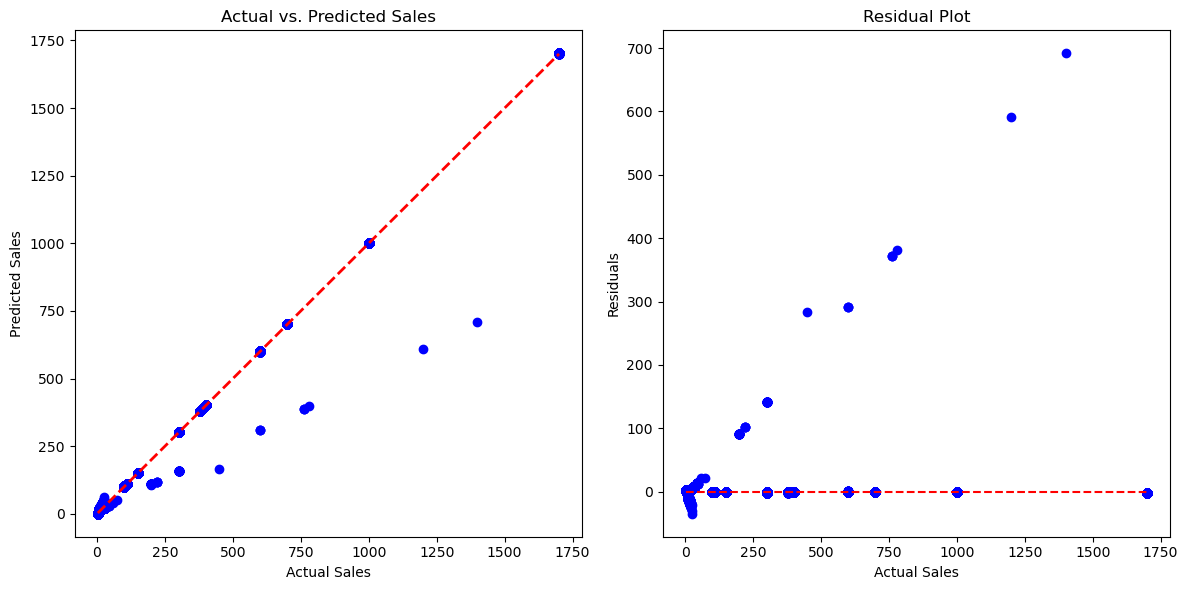

In [101]:

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(12, 6))

# Actual vs. Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')

# Residual Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test - y_pred, color='blue')
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), colors='red', linestyles='--')
plt.xlabel('Actual Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()


Actual vs. Predicted Plot:

This scatter plot will show actual sales values on the x-axis and predicted sales values on the y-axis.

The red dashed line represents the ideal scenario where predicted values match actual values perfectly. Points on this line indicate perfect predictions.


Residual Plot:

This scatter plot will show actual sales values on the x-axis and residuals (errors) on the y-axis.

The red dashed horizontal line at zero indicates no prediction error. Points scattered randomly around this line indicate a good fit.

##### Lets see if sales occured during peak hours or not

In [105]:
# Create a binary target variable for peak hours (1 for peak hours, 0 otherwise)
retail_sales_data['Peak Hour'] = retail_sales_data['Hour'].apply(lambda x: 1 if 9 <= x <= 17 else 0)


In [107]:
# Select features and target variable
features = ['Quantity Ordered', 'Price Each', 'Month', 'Hour'] + list(retail_sales_data.columns[retail_sales_data.columns.str.startswith('Product Category_')]) + list(retail_sales_data.columns[retail_sales_data.columns.str.startswith('Product_')]) + list(retail_sales_data.columns[retail_sales_data.columns.str.startswith('City_')]) + list(retail_sales_data.columns[retail_sales_data.columns.str.startswith('Time of Day_')])
X = retail_sales_data[features]
y = retail_sales_data['Peak Hour']


In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize the model
model = LogisticRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


In [110]:
# Classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.97      0.96      0.97     17449
           1       0.97      0.98      0.97     19741

    accuracy                           0.97     37190
   macro avg       0.97      0.97      0.97     37190
weighted avg       0.97      0.97      0.97     37190



Precision:
Class 0: 0.97
Class 1: 0.97
Explanation: Precision is the ratio of true positive predictions to the total positive predictions. It measures the accuracy of positive predictions. A precision of 0.97 for both classes indicates that 97% of the positive predictions for both classes (peak hours and non-peak hours) are correct.
                                                                                                                                                                                                                                         
Recall:
Class 0: 0.96
Class 1: 0.98
Explanation: Recall (sensitivity) is the ratio of true positive predictions to the total actual positives. It measures how well the model captures all positive instances. A recall of 0.96 for class 0 indicates that 96% of actual non-peak hours are correctly identified. A recall of 0.98 for class 1 means that 98% of actual peak hours are correctly identified.
                                                                                                                                                                                                                                         
F1-Score:
Class 0: 0.97
Class 1: 0.97
Explanation: The F1-score is the harmonic mean of precision and recall, providing a single metric that balances both. An F1-score of 0.97 for both classes suggests a very balanced performance, effectively managing precision and recall.

Support:
Class 0: 17449
Class 1: 19741
Explanation: Support is the number of actual occurrences of each class in the test set. There are 17,449 instances of class 0 (non-peak hours) and 19,741 instances of class 1 (peak hours).

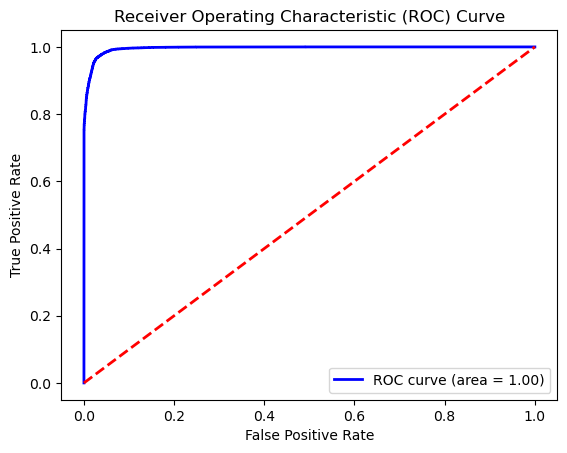

In [112]:
# Calculate ROC AUC score
y_pred_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Generate ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


##### Model Selection and Evaluation Justification
Model Selection: Logistic Regression

Reason: For the binary classification problem of predicting peak hours, logistic regression is a good starting point due to its simplicity and interpretability. It’s effective for binary outcomes and provides probabilities for each class, which can be useful for further analysis.

Evaluation Metrics:

ROC AUC Score: This metric measures the area under the Receiver Operating Characteristic (ROC) curve, which plots the true positive rate against the false positive rate at various threshold settings. The ROC AUC score is beneficial because it evaluates the model's ability to distinguish between the two classes regardless of the classification threshold.

Classification Report: This includes precision, recall, and F1-score, which provide detailed insights into the model's performance on both classes. Precision measures the ratio of true positives to the sum of true positives and false positives, recall measures the ratio of true positives to the sum of true positives and false negatives, and the F1-score is the harmonic mean of precision and recall, which gives a single measure of the model’s performance.

##### Overview/Conclusion

The logistic regression model trained to predict peak hours in the e-commerce sales dataset provided valuable insights into customer behavior patterns. By examining the classification report, we gained a comprehensive understanding of the model's precision, recall, and F1-score. The ROC curve and its AUC score further validated the model's ability to distinguish between peak and non-peak hours, highlighting its robustness.

Through this modeling process, we recognized the significance of proper feature encoding, data preprocessing, and handling categorical variables. The insights gained emphasize the importance of considering various factors such as product categories, order quantities, prices, and temporal aspects (like hours and months) in predicting sales trends.

#### End of Milestone 3

#### Below are Updates to reviews after Milestone 3

Linear regression model is worked through the influence of Month and Hour on sales, providing a more comprehensive model than simply calculating total sales as Price Each * Quantity Ordered.

Logistic regression model for this project, provides validation on the peak hours sales providing insights to customer behavior patterns helping in planning of inventory during the peak seasons by month or the peak hours of a day.

Also, validating some of the review comments from Milestone 3 - performed another model (KNN) to review how additional features like Month and Hour plays a role in future predictions

##### KNN Model and plot below -

All Features - Mean Squared Error: 29.502848276633507
All Features - R-squared: 0.9997357975117843
Limited Features - Mean Squared Error: 7.311628139607427
Limited Features - R-squared: 0.9999345232592705


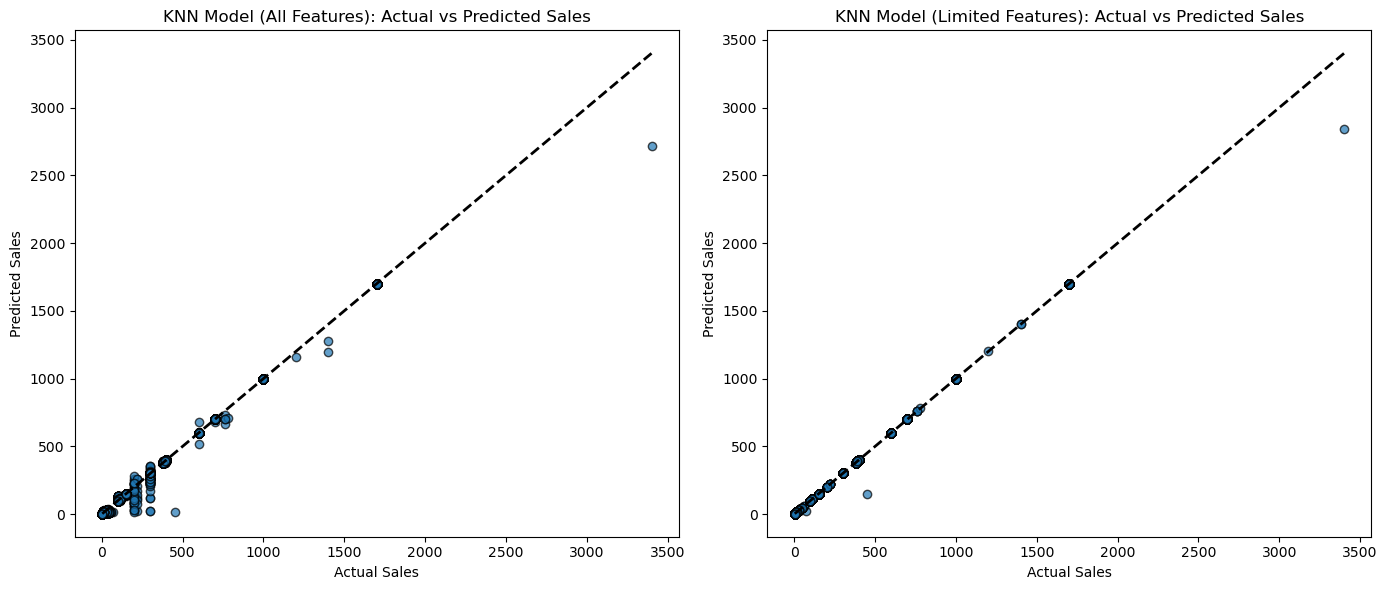

In [144]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Define feature sets
features_all = ['Quantity Ordered', 'Price Each', 'Month', 'Hour']
features_limited = ['Quantity Ordered', 'Price Each']
target = 'Sales'

X_all = retail_sales_data[features_all]
X_limited = retail_sales_data[features_limited]
y = retail_sales_data[target]

# Standardize the features
scaler_all = StandardScaler()
X_scaled_all = scaler_all.fit_transform(X_all)

scaler_limited = StandardScaler()
X_scaled_limited = scaler_limited.fit_transform(X_limited)

# Train-test split for all features
X_train_all, X_test_all, y_train, y_test = train_test_split(X_scaled_all, y, test_size=0.3, random_state=42)

# Train-test split for limited features
X_train_limited, X_test_limited, y_train, y_test = train_test_split(X_scaled_limited, y, test_size=0.3, random_state=42)

# Create and fit the KNN model for all features
knn_all = KNeighborsRegressor(n_neighbors=5)
knn_all.fit(X_train_all, y_train)

# Create and fit the KNN model for limited features
knn_limited = KNeighborsRegressor(n_neighbors=5)
knn_limited.fit(X_train_limited, y_train)

# Predict on the test set for all features
y_pred_all = knn_all.predict(X_test_all)

# Predict on the test set for limited features
y_pred_limited = knn_limited.predict(X_test_limited)

# Evaluate the models
mse_all = mean_squared_error(y_test, y_pred_all)
r2_all = r2_score(y_test, y_pred_all)

mse_limited = mean_squared_error(y_test, y_pred_limited)
r2_limited = r2_score(y_test, y_pred_limited)

print(f'All Features - Mean Squared Error: {mse_all}')
print(f'All Features - R-squared: {r2_all}')
print(f'Limited Features - Mean Squared Error: {mse_limited}')
print(f'Limited Features - R-squared: {r2_limited}')

# Plot actual vs predicted sales for all features
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_all, edgecolors=(0, 0, 0), alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('KNN Model (All Features): Actual vs Predicted Sales')

# Plot actual vs predicted sales for limited features
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_limited, edgecolors=(0, 0, 0), alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('KNN Model (Limited Features): Actual vs Predicted Sales')

plt.tight_layout()
plt.show()


From above plots, with consideration of Month and Hour - we can clearly visualize the impact of those features although it is very minimal on the total sales.